#**Naive Bayes Classifier**

The code was written with reference to the 'Buy_Computer.csv' that'll explain the references in the comments.


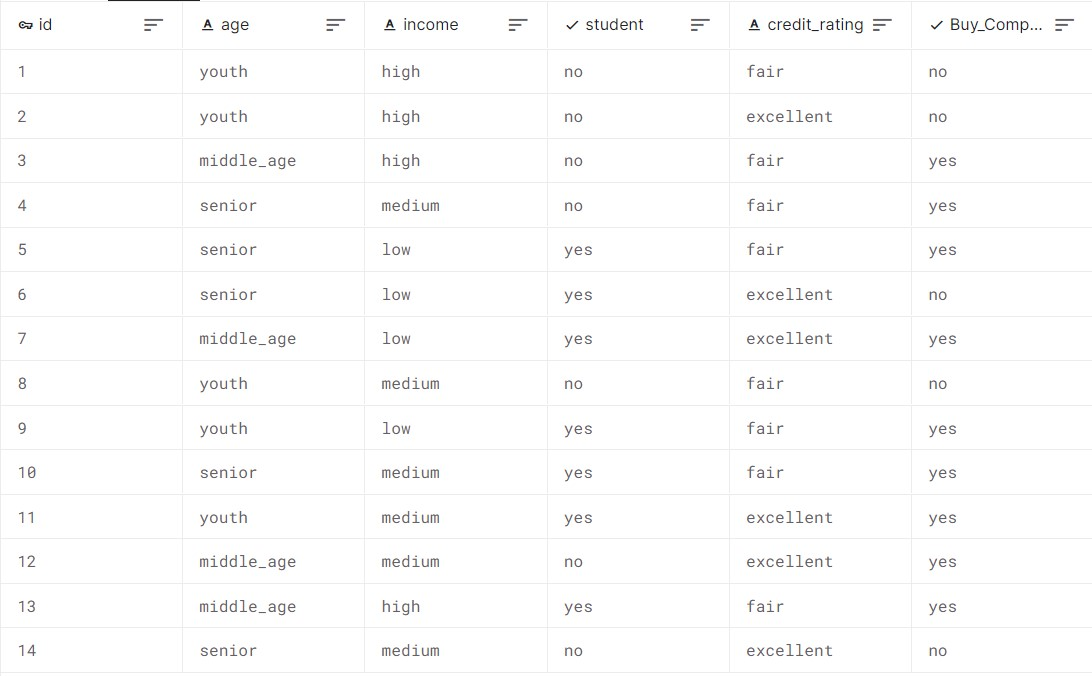

*Some reference for Naive Bayes Classifier: https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c*

*Heres the link to the dataset:
https://www.kaggle.com/datasets/usman27/buy-computer?resource=download*

Feel free to run on different datasets and in case of any issues contact me via my github profile.

In [10]:
import pandas as pd
import numpy as np
import csv

In [4]:
dataset = pd.read_csv('Buy_Computer.csv')

In [5]:
Y = dataset[dataset.columns[-1]]
#class column
X = dataset.drop(dataset.columns[-1], axis=1).drop(dataset.columns[0], axis=1)
#remaining columns without index column and Buy_computer
dataset_dum = dataset.drop(dataset.columns[0], axis=1)
outcome_class = dataset.columns[-1]
#column of Buy_computer
y_train = Y.to_numpy()
train_size = len(y_train)
outcomes = {}
for d in np.unique(y_train):
  outcomes.update({d:sum(y_train == d)})
#outcomes contain total of yes and no i.e. yes:9 no:5
prior_class = [ round(value/train_size, 3) for value in outcomes.values()]
#priorities of yes and no in buy_computer class

In [6]:
# print(prior_class)
features = list(X.columns)
#remaining columns i.e. age, credit_rating and so on

In [7]:
cd_prob = {}
for feature in features:
  # ex: age
  cd_array = dataset[[feature, outcome_class]].to_numpy()
  for subfeature in np.unique(X[feature].to_numpy()):
    # ex: middle_age
    dum = np.where(cd_array==subfeature)[0]
    #filter only rows with subfeature i.e. middle_age in this case
    filter_array = np.array([cd_array[d] for d in dum])
    for outcome in outcomes.keys():
      tot = len(np.where(filter_array == outcome)[1])
      #after filtering for subfeature filter for yes and no
      cd_prob.update({subfeature+'|'+outcome: round(tot/outcomes[outcome], 3)})
print(cd_prob)
#cd_prob contains middle_age|yes or middle|no and so on

{'middle_age|no': 0.0, 'middle_age|yes': 0.444, 'senior|no': 0.4, 'senior|yes': 0.333, 'youth|no': 0.6, 'youth|yes': 0.222, 'high|no': 0.4, 'high|yes': 0.222, 'low|no': 0.2, 'low|yes': 0.333, 'medium|no': 0.4, 'medium|yes': 0.444, 'no|no': 4.0, 'no|yes': 0.444, 'yes|no': 0.8, 'yes|yes': 3.111, 'excellent|no': 0.6, 'excellent|yes': 0.333, 'fair|no': 0.4, 'fair|yes': 0.667}


In [8]:
def naiveBayespredict(X_data):
  if type(X_data[0]) == type([]):
    dum_data = X_data
  else: 
    dum_data = [X_data]
  prob_outcomes = [1,1]
  result = []
  for query in dum_data:
    count = 0
    for outcome in outcomes.keys():
      for elem in query:
        prob_outcomes[count] = cd_prob[elem+'|'+outcome] * prob_outcomes[count]
      prob_outcomes[count] = prob_outcomes[count] * prior_class[count]
      count += 1
    result.append('yes' if max(prob_outcomes)==prob_outcomes[1] else 'no')
    prob_outcomes = [1,1]
  return result

In [9]:
query = [['youth','medium','yes','fair'],['youth','high','no','fair']]
result = naiveBayespredict(query)
for i in range(len(query)):
  print('For Query = ',query[i],'Buy_Computer = ',result[i])

For Query =  ['youth', 'medium', 'yes', 'fair'] Buy_Computer =  yes
For Query =  ['youth', 'high', 'no', 'fair'] Buy_Computer =  no
